### **Trabajo practico Almacenamiento y procesamiento de datos**



#1) Problema de negocio

Somos una consultora contratada por el ministerio de hacienda de brasil. Nos contactaron para determinar cuales eran los features de los automoviles que hacian que sus precios sean mas elevados.

¿Cuales son las caracteristicas de los autos mas caros del mercado en brasil 2022?



#2) Set de datos

La informacion esta disponible en Kaggle, la metodologia de extraccion es a traves de API desde el sitio kaggle.

Contiene 290275 registros y 12 atributos.

Los variables son:

"year_of_reference"   : Año de realizacion del informe. Numerica

"month_of_reference"  : Mes de realizacion del informe. Numerica

"fipe_code"           : Codigo interno de catalogo de FIPE. Categorica

"authentication"      : Identificador alfanumerico unico para consulta en sitio web de FIPE. Categorica.  

"brand"               : Marca del automovil. Categorica (86 marcas)

"model"               : Modelo del automovil. Categorica (6064 modelos)

"fuel"                : Tipo de combustible. Categorica (Nafta, Diesel y Alcohol)

"gear"                : Tipo de Transmision. Categorica (Manual o Automatico)

"engine_size"         : Cilindrada del Motor en litros. Numerica  

"year_model"          : Año de fabricación. Numerica  

"avg_price_brl"       : Precio promedio de venta medido por FIPE. Numerica  

"age_years"           : Antiguedad del vehiculo. Numerica

In [ ]:
# @title
# Descargamos la libreria de Kaggle

!pip install kaggle

In [ ]:
# @title
# Desde https://www.kaggle.com/settings creamos un nuevo token para que se valide la consulta de api. La key es a traves de un formato json que se llama "kaggle.json".

from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# @title
# Importamos las librerias que vamos a utilizar

import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder

In [ ]:
# @title
# Captura del data set a traves de API

api=KaggleApi()
api.authenticate()
api.dataset_download_file("vagnerbessa/average-car-prices-bazil", file_name="fipe_2022.csv")

Dataset URL: https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil


True

In [ ]:
# @title
# Descomprime archivo ZIP en CSV
with  zipfile.ZipFile("fipe_2022.csv.zip","r") as zipref:
  zipref.extractall()

In [ ]:
# @title
# Convertimos CSV a Dataframe de Pandas.
datos= pd.read_csv("fipe_2022.csv")
datos.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [ ]:
# @title
# Analisis preliminar del dataset.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


☝ **OBSERVACIÓN:** Observamos que la cantidad de datos de todas las variables coinciden con el total de registros. Por lo tanto hacemos una primera deduccion de que no se encuentran valores en blanco para ninguna variable.

# 3) Limpieza del dato



In [ ]:
# @title
#Borra o dropea los registros que tengan algún valor Null o faltantes y los sobreescribe con el siguiente
datos.dropna(inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


☝ **OBSERVACIÓN:** No se encontraron valores vacios.
Antes del drop teniamos 290275 registros, despues del drop tenemos las mismas.

In [ ]:
# @title
# Conteo de los niveles en las diferentes columnas
cols_cat = ["year_of_reference","month_of_reference","fipe_code","authentication","brand",	"model",	"fuel",	"gear",	"engine_size",	"year_model",	"avg_price_brl","age_years"]

for col in cols_cat:
  print(f'Columna {col}: {datos[col].nunique()} subniveles')

#nunique : Devuelve el número de elementos distintos para el objeto dado

Columna year_of_reference: 1 subniveles
Columna month_of_reference: 12 subniveles
Columna fipe_code: 5903 subniveles
Columna authentication: 290273 subniveles
Columna brand: 86 subniveles
Columna model: 6064 subniveles
Columna fuel: 3 subniveles
Columna gear: 2 subniveles
Columna engine_size: 56 subniveles
Columna year_model: 39 subniveles
Columna avg_price_brl: 143674 subniveles
Columna age_years: 39 subniveles


☝ **OBSERVACIÓN:** la variable year_of_reference solo tiene un subnivel. Lo cual no nos aporta informacion relevante.

In [ ]:
# @title
# Ejemplo de las distintas categorias que toma la variable marca
datos["brand"].unique()

array(['Acura', 'Agrale', 'Alfa Romeo', 'AM Gen', 'Asia Motors',
       'ASTON MARTIN', 'Audi', 'Baby', 'BMW', 'BRM', 'CAB Motors',
       'Cadillac', 'CBT Jipe', 'CHANA', 'CHANGAN', 'Caoa Chery',
       'GM - Chevrolet', 'Chrysler', 'Citroën', 'Cross Lander', 'Daewoo',
       'Daihatsu', 'Dodge', 'EFFA', 'Engesa', 'Envemo', 'Ferrari', 'Fiat',
       'Fibravan', 'Ford', 'FOTON', 'Fyber', 'GEELY', 'GREAT WALL',
       'HAFEI', 'Honda', 'Hyundai', 'Isuzu', 'IVECO', 'JAC', 'Jaguar',
       'Jeep', 'JINBEI', 'JPX', 'Kia Motors', 'Lada', 'Land Rover',
       'Lexus', 'LIFAN', 'LOBINI', 'Lotus', 'Mahindra', 'Maserati',
       'Matra', 'Mazda', 'Mclaren', 'Mercedes-Benz', 'Mercury', 'MG',
       'MINI', 'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Pontiac',
       'Porsche', 'RAM', 'RELY', 'Renault', 'Rolls-Royce', 'Rover',
       'Saab', 'Saturn', 'Seat', 'SHINERAY', 'smart', 'SSANGYONG',
       'Subaru', 'Suzuki', 'TAC', 'Toyota', 'Troller', 'VW - VolksWagen',
       'Volvo', 'Wake', 'Wa

In [ ]:
# @title
#Filas repetidas, utilizamos el método drop_duplicates para eliminar los registros repetidos

print(datos[datos.duplicated(keep=False)])

print(f'Tamaño del set antes de eliminar las filas repetidas: {datos.shape}')
datos.drop_duplicates(inplace=True)
datos.dropna(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {datos.shape}')


        year_of_reference month_of_reference fipe_code authentication  \
98996                2022                May  004051-7   gb76cyvp29j4   
99002                2022                May  004051-7   gb76cyvp29j4   
275481               2022           December  003296-4   3r6c277cnqcb   
275482               2022           December  003296-4   3r6c277cnqcb   

                 brand                                     model      fuel  \
98996   GM - Chevrolet  Monza Classic SE 2.0 /MPFI e EFI 2p e 4p  Gasoline   
99002   GM - Chevrolet  Monza Classic SE 2.0 /MPFI e EFI 2p e 4p  Gasoline   
275481            Ford   Ranger Limited 3.0 PSE 4x4 CD TB Diesel    Diesel   
275482            Ford   Ranger Limited 3.0 PSE 4x4 CD TB Diesel    Diesel   

          gear  engine_size  year_model  avg_price_brl  age_years  
98996   manual          2.0        1992        10655.0         31  
99002   manual          2.0        1992        10655.0         31  
275481  manual          3.0        2007

☝ **OBSERVACIÓN:** Encontramos 2 filas duplicadas (98996 con la 99002 y la 275481 con la 275482) y eliminamos automaticamente el duplicado. Por lo tanto el dataset pasa a tener 290273 filas.

In [ ]:
# @title
#calculamos los principales estadisticos de las variables numericas
datos.describe()

,year_of_reference,engine_size,year_model,avg_price_brl,age_years
count,290273.0,290273.000000,290273.000000,2.902730e+05,290273.000000
mean,2022.0,2.266045,2008.896697,1.220878e+05,14.103303
std,0.0,1.033112,9.263597,3.219149e+05,9.263597
min,2022.0,0.700000,1985.000000,1.831000e+03,0.000000
25%,2022.0,1.600000,2001.000000,2.187500e+04,7.000000
50%,2022.0,2.000000,2010.000000,4.683600e+04,13.000000
75%,2022.0,2.800000,2016.000000,1.061660e+05,22.000000
max,2022.0,6.700000,2023.000000,8.600000e+06,38.000000


☝ **OBSERVACIÓN:** Vemos que la desviacion estandar de la variable year_of_reference es igual a 0 por lo tanto no aporta valor.

In [ ]:
# @title
#Se eliminan las variables que no aportan valor
columnas_eliminar = ["fipe_code", "authentication", "year_of_reference"]
datos.drop(columnas_eliminar, inplace=True, axis=1)
datos.head()

,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,January,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,January,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,January,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,January,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,January,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


☝ **OBSERVACIÓN:** Eliminamos year_of_reference porque tiene un solo valor. Eliminamos fipe_code y authentication porque son variables identificadoras sin relevancia para el estudio.

# 4) Analisis exploratorio

In [ ]:
# @title
# Agregamos a 2 listas distintas el nombre de las columnas segun su tipo.
col_categoricas = datos.select_dtypes("object").columns
col_numericas = datos.select_dtypes(include=['int', 'float']).columns

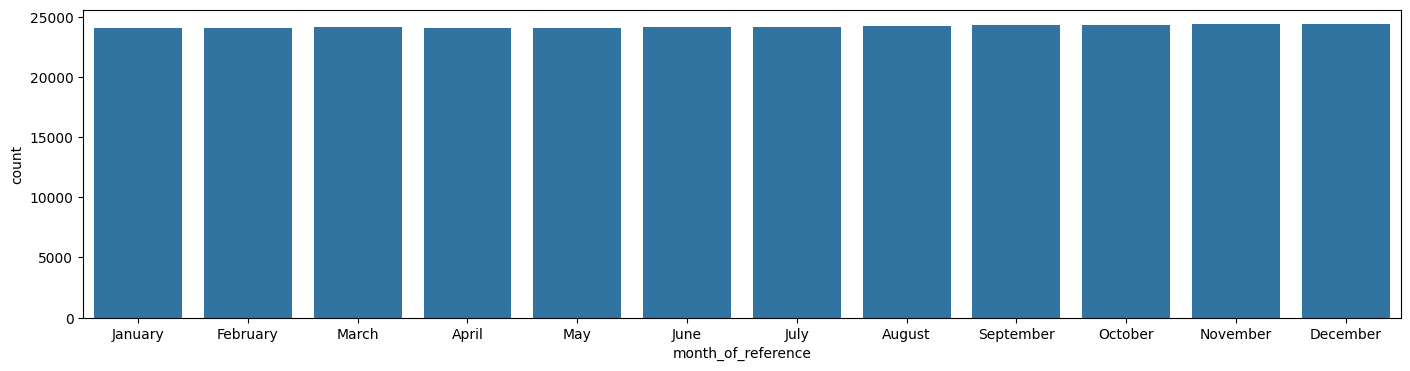

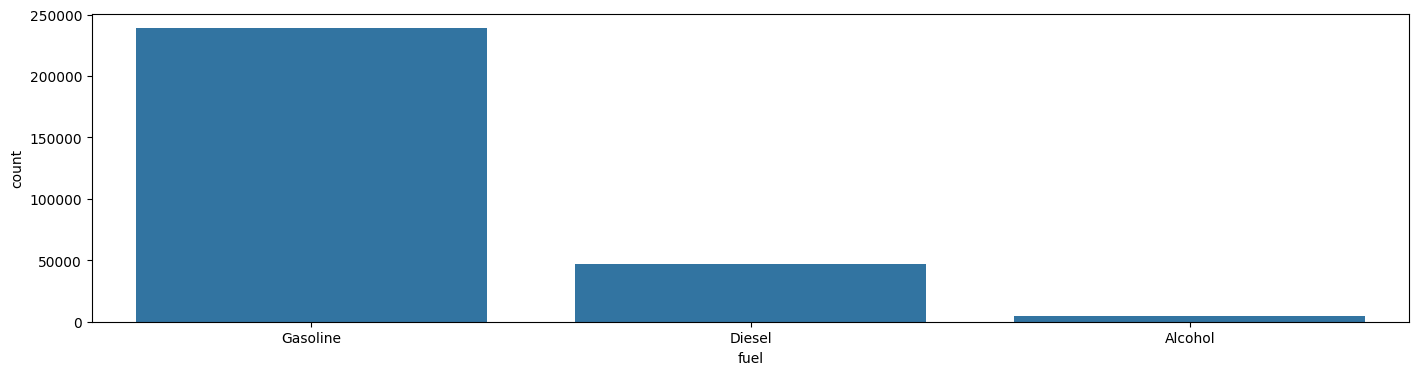

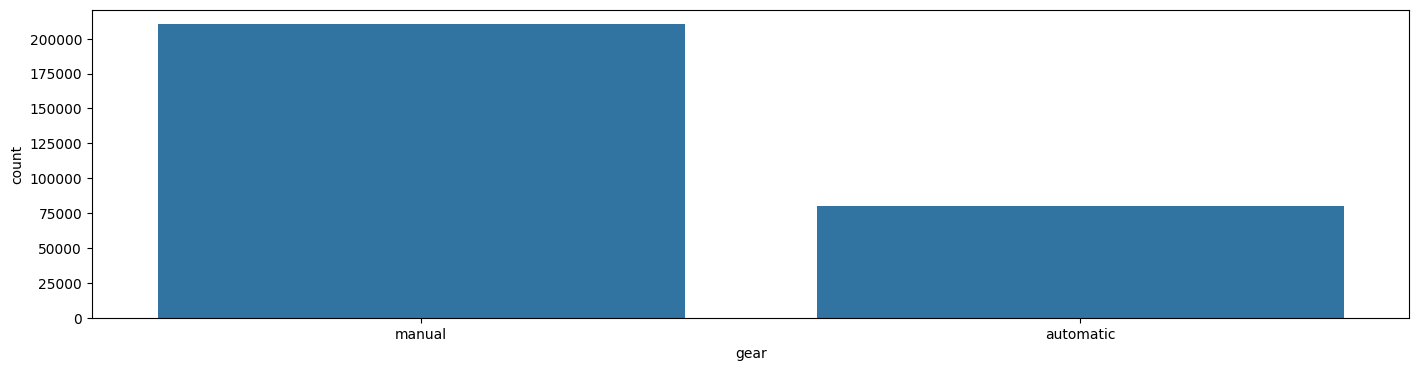

In [ ]:
# @title
# Graficamos cada variable categorica de manera individual en un grafico de barras
col_categoricas_bucle = col_categoricas.drop(["model", "brand"])
for i in col_categoricas_bucle:
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17,4))
  fig.subplots_adjust(hspace=0.5)
  sns.countplot(x=i, data=datos)


☝ **OBSERVACIÓN:**

Para la variable month_of_reference la distribucion es practicamente identica para todos los valores y vamos a tener que amplificar para encontrar diferencias.

Se observa que la frecuencia de los autos/modelos de combustible gasolina es superior a la de diesel y esta a su vez es superior a la de alcohol. La de alcohol es relativamente muy inferior a las otras.

Tambien encontramos que la cantidad de vehiculos con transmision manual supera por mas del doble a las de automaticas.

Text(0.5, 1.0, 'Variacion Mensual')

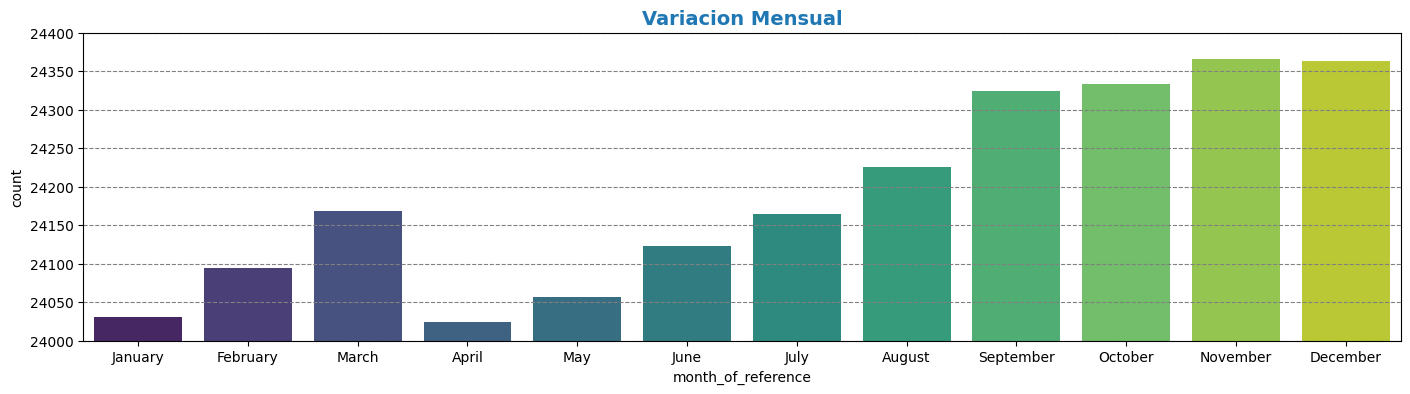

In [ ]:
# @title
#Amplificamos el grafico de mes de referencia, incorporamos titulo, colores y lineas de referencia para facilitar visualizacion

col = "month_of_reference"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17,4))
fig.subplots_adjust(hspace=0.5)
sns.countplot(x=col, data=datos, palette='viridis', hue = 'month_of_reference')
ax.set_ylim(24000, 24400)
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.set_title('Variacion Mensual', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold',
'color':'tab:blue'})

☝ **OBSERVACIÓN:** utilizamos filtros para el eje Y entre 24000 y 24400 para observar la cantidad de modelos y su variacion por mes.
La mayor variedad de modelos vendidos fue en noviembre y la mas baja en abril.

# 5) Analisis univariado



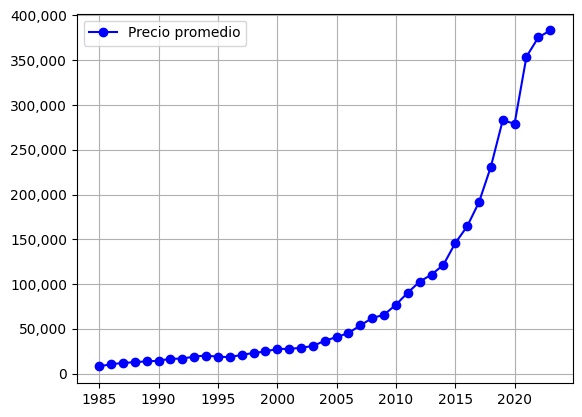

In [ ]:
# @title
# Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el año del modelo (year_model)
grupo = datos[['year_model', "avg_price_brl"]].groupby('year_model').mean()
plt.plot(grupo.index, grupo["avg_price_brl"], marker='o', linestyle='-', color='b', label='Precio promedio')
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid()
plt.show()

☝ **OBSERVACIÓN:** A medida que el año del vehiculo es mas nuevo, el precio es mayor.

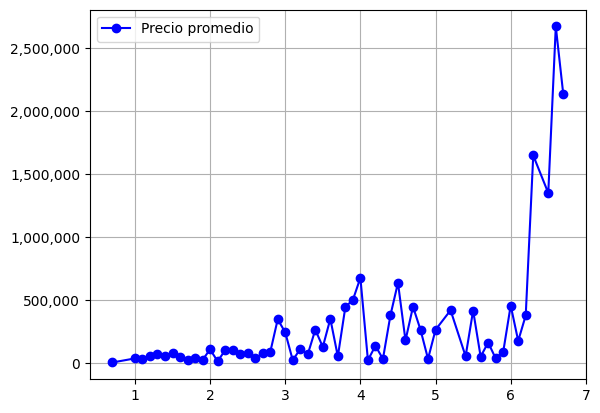

In [ ]:
# @title
# Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el tamaño del motor (engine_size)
from matplotlib.ticker import FuncFormatter
grupo = datos[['engine_size', 'avg_price_brl']].groupby('engine_size').mean()
plt.plot(grupo.index, grupo["avg_price_brl"], marker='o', linestyle='-', color='b', label='Precio promedio')
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.grid()
plt.show()

☝ OBSERVACIÓN:

 A mayor cilindrada, mayor precio.

Para motores chicos (menores a 3 litos) los precios son mas bajos.

Para motores medios (entre 3 y 6) los precios son mas altos, pero variados.

Para motores grandes (mayores a 6) los precios son relativamente mucho mayores.

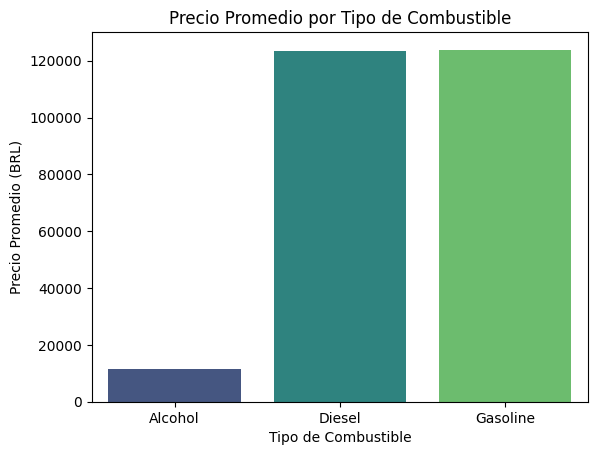

In [ ]:
# @title
# Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el tipo de combustible (fuel)
grupo = datos[['fuel', 'avg_price_brl']].groupby(["fuel"]).mean().reset_index()
sns.barplot(y="avg_price_brl", x="fuel", data=grupo, palette='viridis', hue='fuel')

formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))

plt.ylabel('Precio Promedio (BRL)')
plt.xlabel('Tipo de Combustible')
plt.title('Precio Promedio por Tipo de Combustible')
plt.show()

☝ OBSERVACIÓN: Los precios de autos con combustible de alcohol son relativamente mas bajos. Mientras que la media del precio de Diesel y Gasolina son similares.

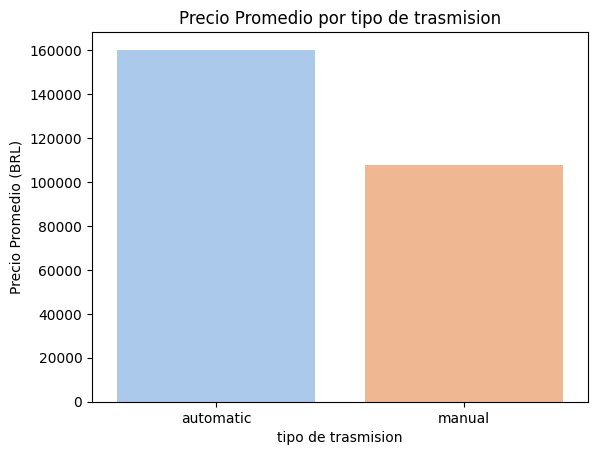

In [ ]:
# @title
# Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el tipo de transmision (gear)
grupo = datos[['gear', 'avg_price_brl']].groupby(["gear"]).mean().reset_index()
sns.barplot(y="avg_price_brl", x="gear", data=grupo, palette='pastel', hue='gear')

formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))


plt.ylabel('Precio Promedio (BRL)')
plt.xlabel('tipo de trasmision')
plt.title('Precio Promedio por tipo de trasmision')

plt.show()

☝ OBSERVACIÓN: En promedio general de los modelos de todos los años, el vehiculo automatico es mas caro que el manual.

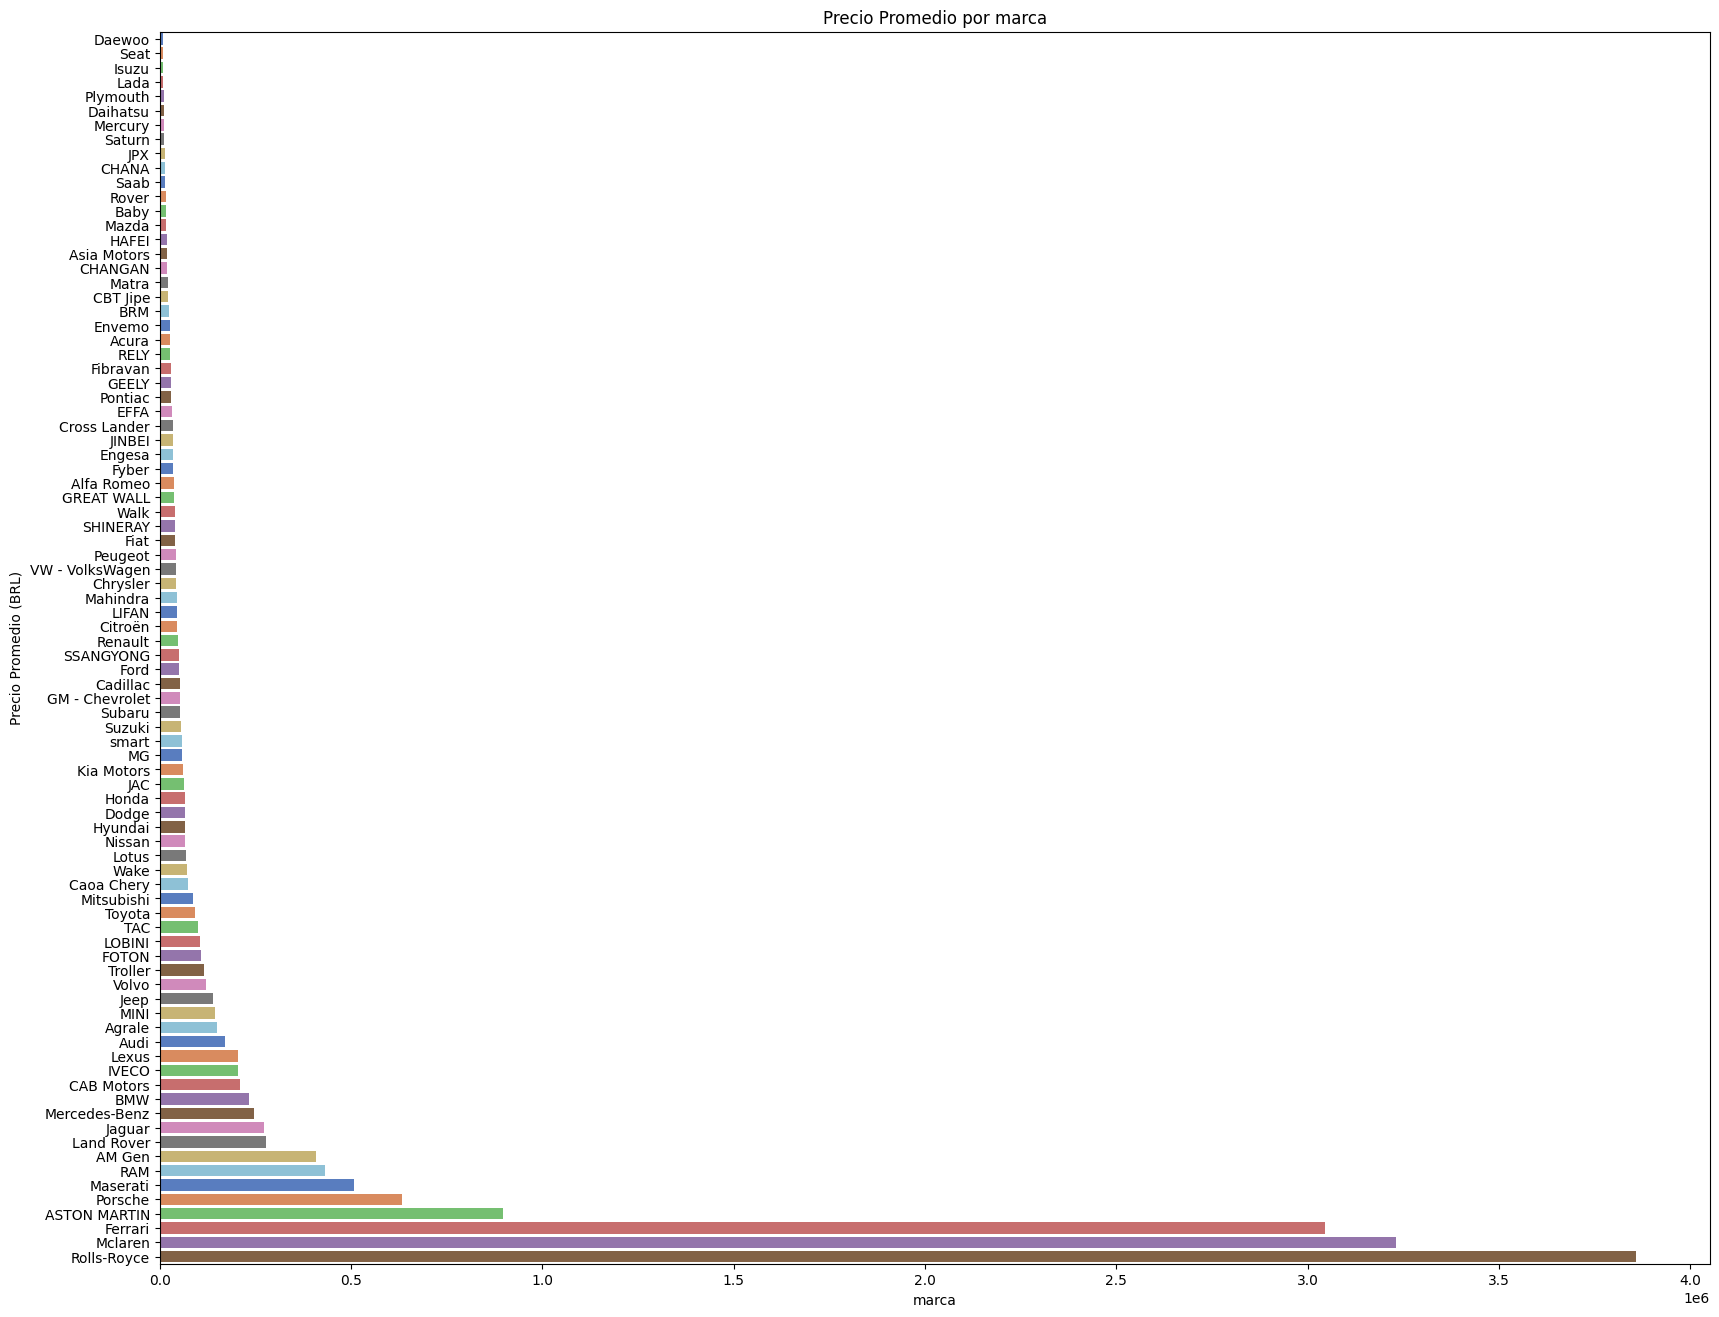

In [ ]:
# @title
## Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra la marca (brand)
grupo = datos[['brand', 'avg_price_brl']].groupby(["brand"]).mean().sort_values("avg_price_brl").reset_index()
fig, ax = plt.subplots(figsize=(20, 16))
sns.barplot(x="avg_price_brl", y="brand", data=grupo, palette='muted', hue='brand')
plt.ylabel('Precio Promedio (BRL)')
plt.xlabel('marca')
plt.title('Precio Promedio por marca')

plt.show()

☝ OBSERVACIÓN: Vemos que existen marcas relativamente muchas mas caras que otras.

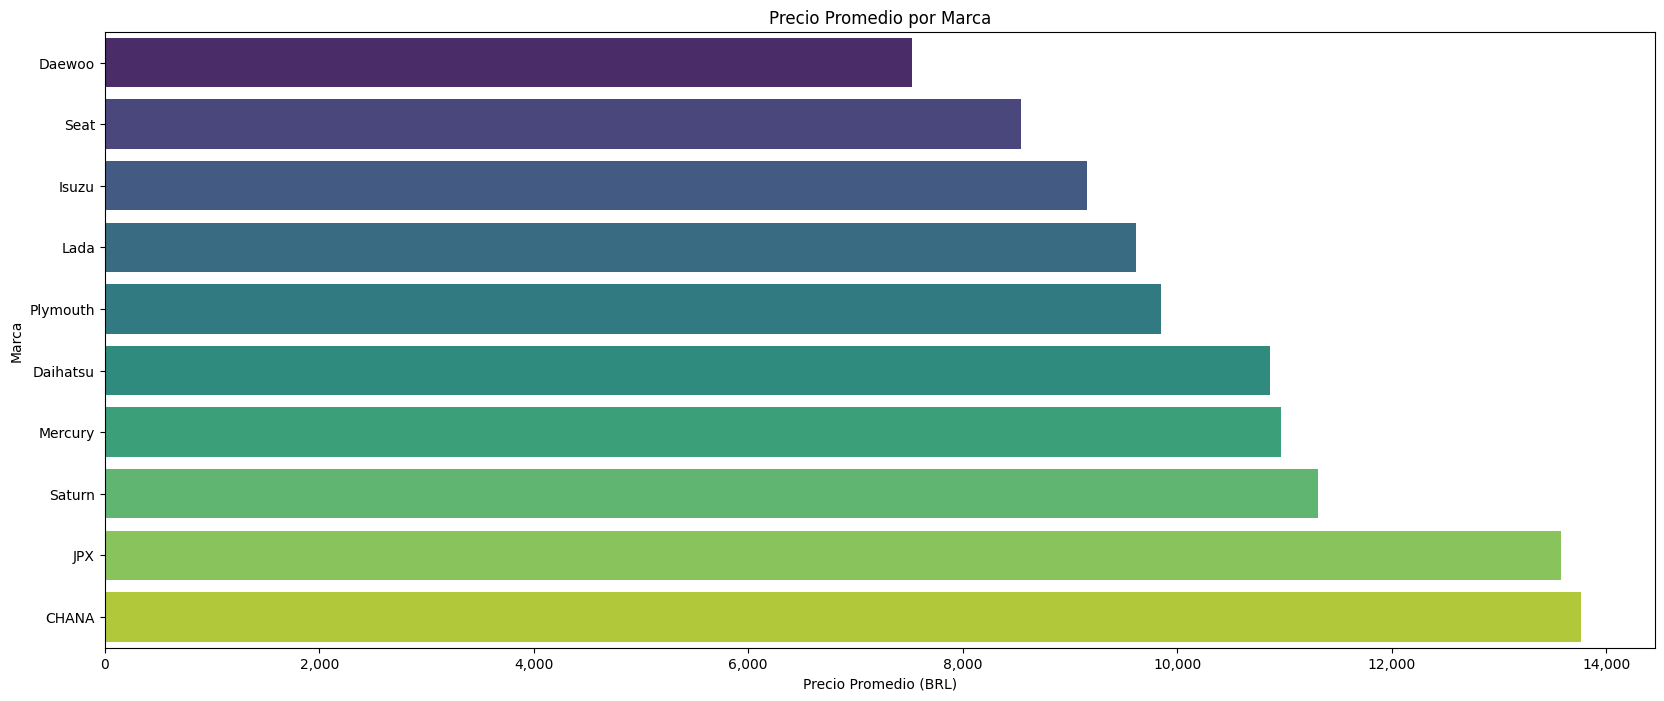

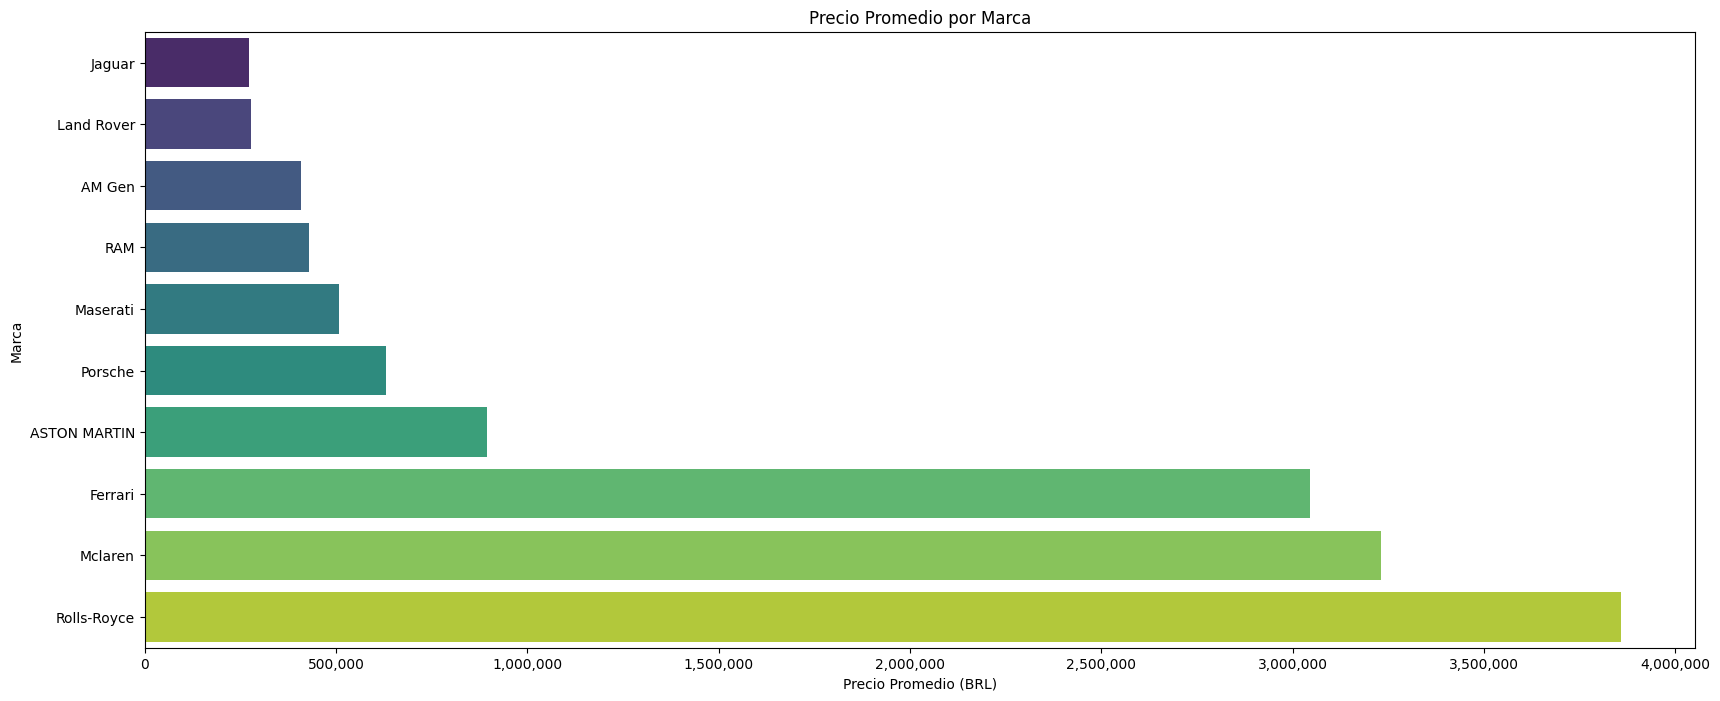

In [ ]:
# @title
# Hacemos un recorte de las 10 marcas mas baratas y las 10 mas caras.
grupo_marca = datos[['brand', 'avg_price_brl']].groupby(["brand"]).mean().sort_values("avg_price_brl").reset_index()
grupo_chico_marca = grupo_marca.head(10)
grupo_grande_marca = grupo_marca.tail(10)

Lista = [grupo_chico_marca, grupo_grande_marca]

for i in Lista:
    fig, ax = plt.subplots(figsize=(20, 8))
    sns.barplot(x='avg_price_brl', y="brand", data=i, palette='viridis', hue='brand')

    formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.xlabel('Precio Promedio (BRL)')
    plt.ylabel('Marca')
    plt.title('Precio Promedio por Marca')

    plt.show()


☝ OBSERVACIÓN:

Entre los mas baratos, contemplando todos los años, se encuentran Daewoo, Seat e Isuzu

Entre los mas caros, contemplando todos los años, se encuentran Rolls-royce, Mclaren y Ferrari.

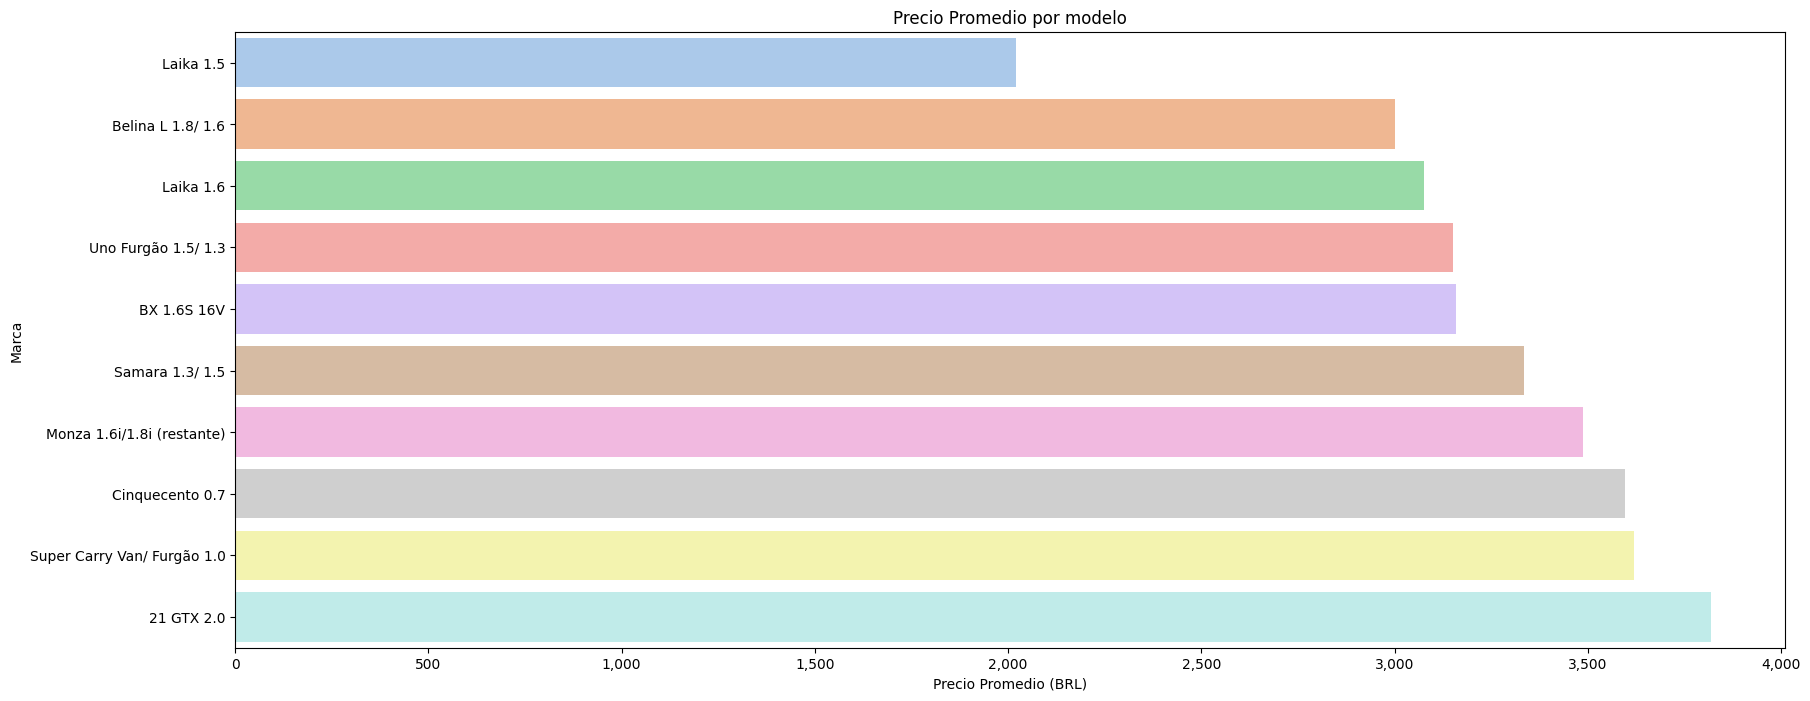

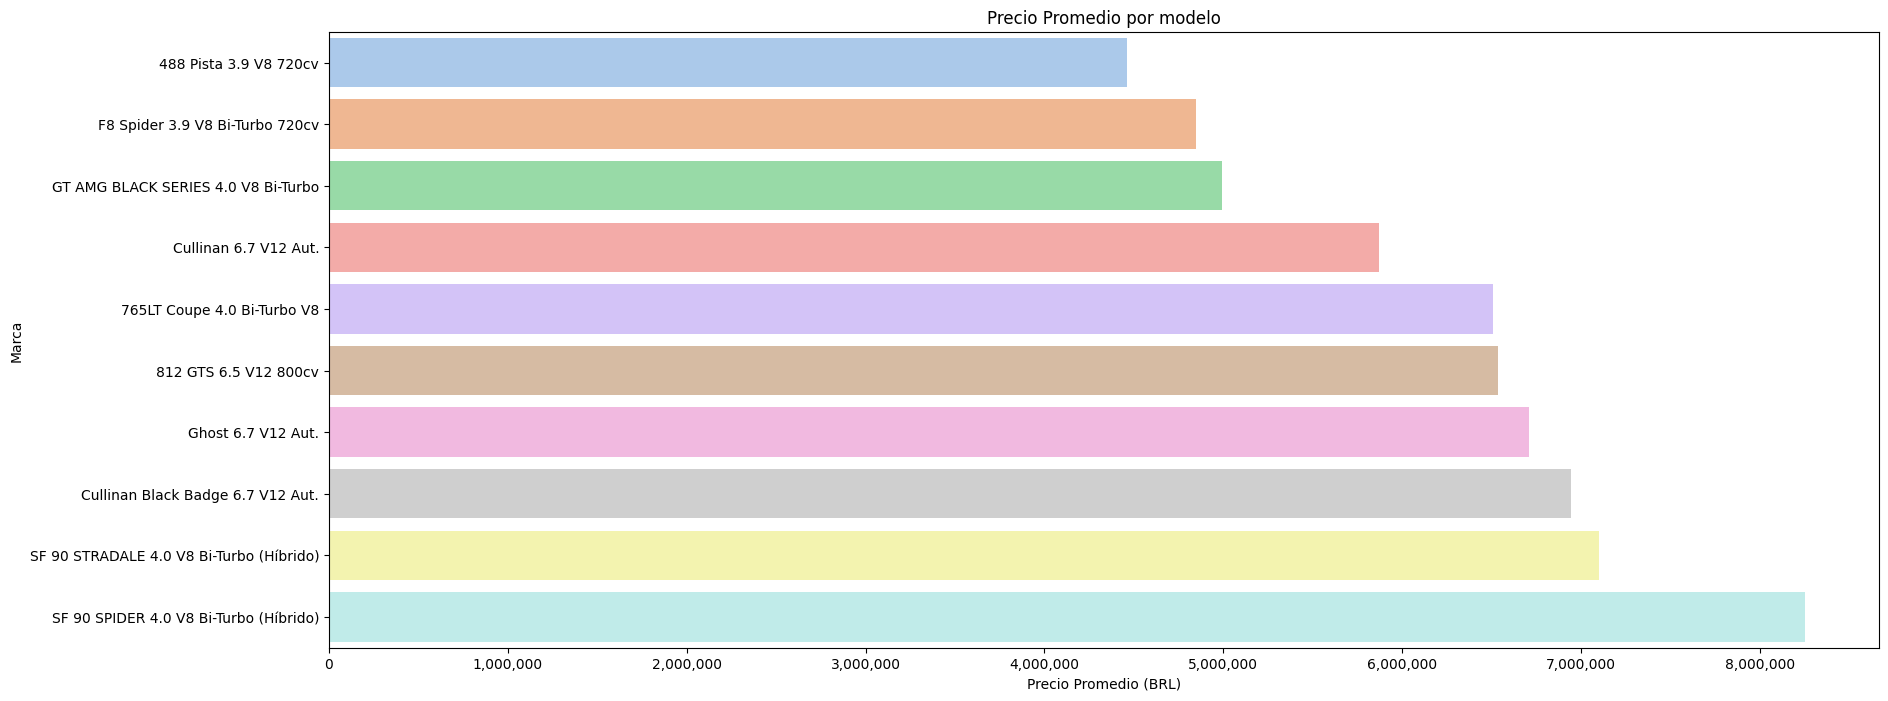

In [ ]:
# @title
## Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el modelo (model) para los 10 casos mas baratos y mas caros.
grupo = datos[['model', 'avg_price_brl']].groupby(["model"]).mean().sort_values("avg_price_brl").reset_index()
grupo_chico_modelo = grupo.head(10)
grupo_grande_modelo = grupo.tail(10)

Lista_modelo = [grupo_chico_modelo,grupo_grande_modelo]

for i in Lista_modelo:
    fig, ax = plt.subplots(figsize=(20, 8))
    sns.barplot(x='avg_price_brl', y="model", data=i, palette='pastel', hue='model')

    formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.xlabel('Precio Promedio (BRL)')
    plt.ylabel('Marca')
    plt.title('Precio Promedio por modelo')

    plt.show()


☝ OBSERVACIÓN:

Entre los mas baratos, contemplando todos los años, se encuentran los Belina, Laika y el Uno Furgon.

Y entre los mas caros, contemplando todos los años, se encuentran el SF90 SPIDER, el SF 90 STRADALE y el Cullinan Black badge.

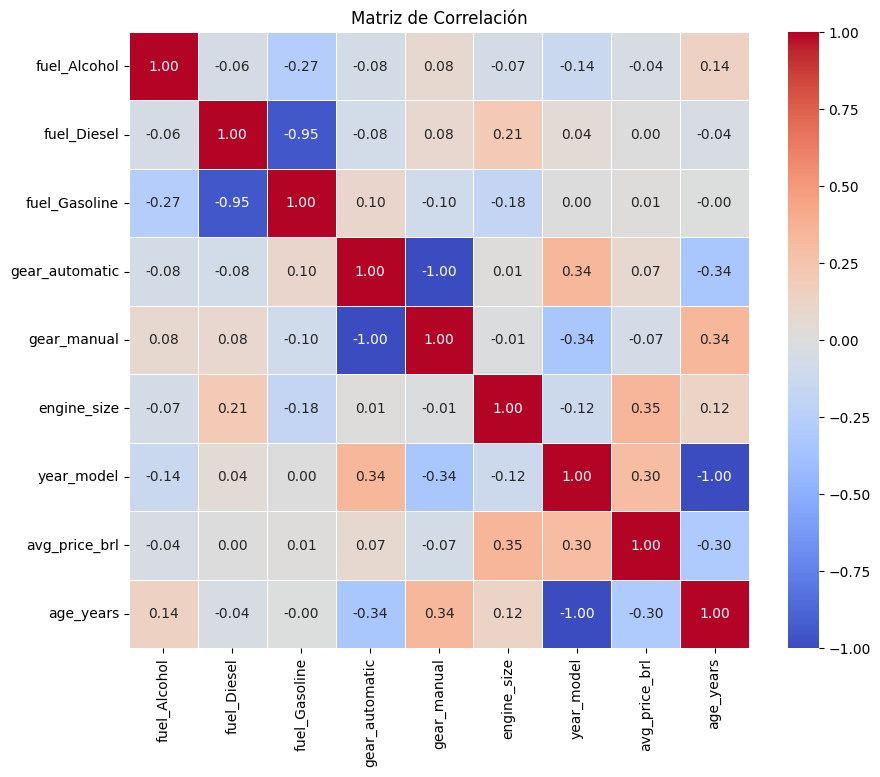

In [ ]:
# @title
# Transformamos las columnas y realizamos una matriz de correlacion entre todas las variables de manera univariada.
columnas_correlacion = ["fuel", "gear", "engine_size", "year_model", "avg_price_brl"]
columnas_numericas = datos.select_dtypes(include=['int', 'float'])

columnas_categoricas = datos[columnas_correlacion].select_dtypes(include=['object'])

datos_codificados = pd.get_dummies(columnas_categoricas)

datos_correlacion = pd.concat([datos_codificados, columnas_numericas], axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(datos_correlacion.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

☝ OBSERVACIÓN: Las correlaciones mas altas entre nuestra variable objetivo son contra el año del modelo y contra el tamano del motor (0.3 y 0.35, es decir, de leve a moderada)

# 6) Analisis bivariado

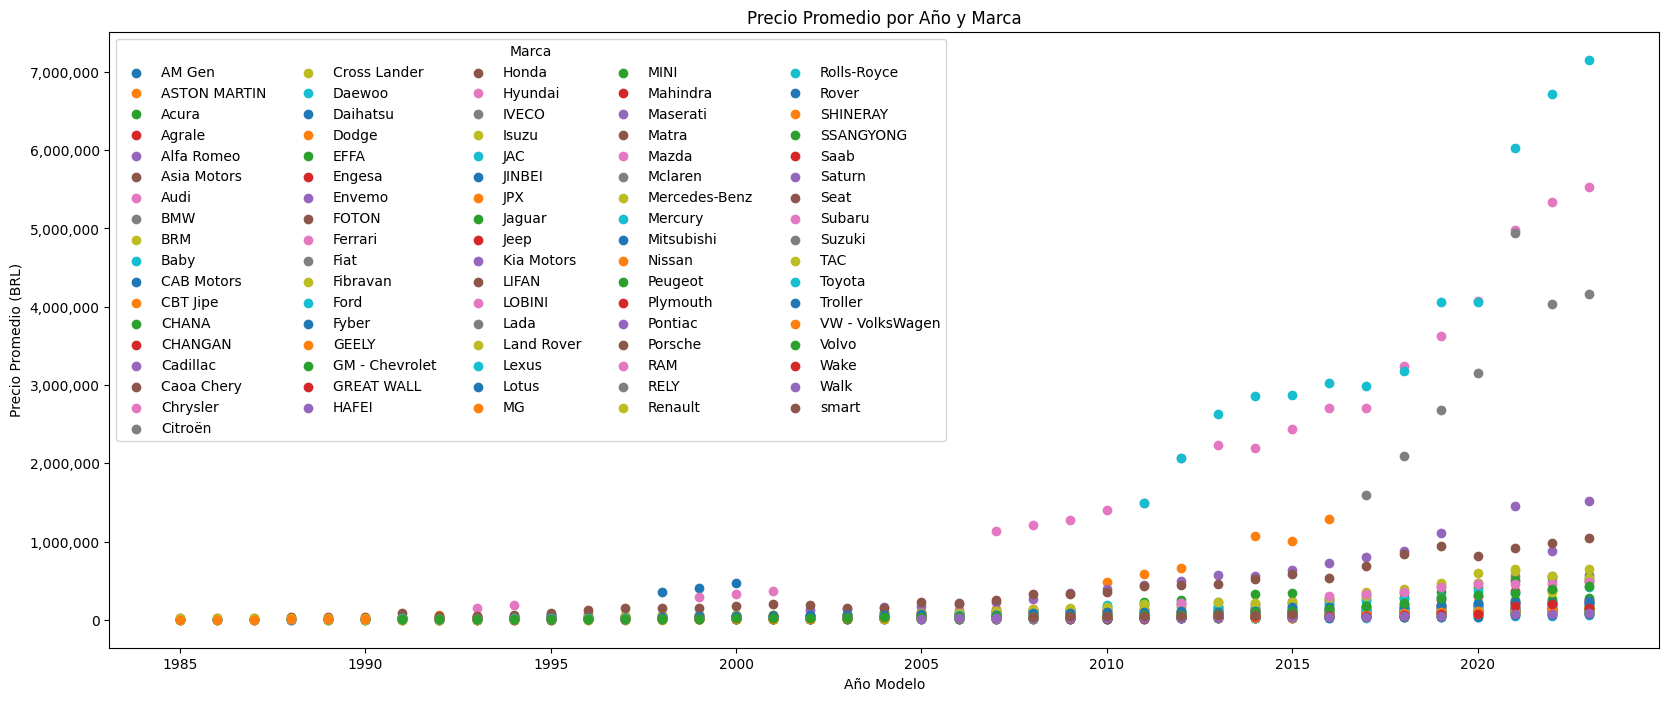

<Figure size 1e+06x600000 with 0 Axes>

In [ ]:
## Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el modelo de año (year_model) y marca (brand).
grupo = datos[['brand', 'avg_price_brl',"year_model"]].groupby(['brand',"year_model"]).mean().reset_index()

fig, ax = plt.subplots(figsize=(20, 8))

brands = grupo['brand'].unique()
for brand in brands:
    brand_data = grupo[grupo['brand'] == brand]
    ax.scatter(brand_data['year_model'], brand_data['avg_price_brl'], label=brand)

ax.set_title('Precio Promedio por Año y Marca')
ax.set_xlabel('Año Modelo')
ax.set_ylabel('Precio Promedio (BRL)')

formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)
plt.figure(figsize=(10000,6000))

ax.legend(title='Marca', loc='upper left', ncol=5)

plt.show()

☝ OBSERVACIÓN: Año tras año existen variaciones de precios promedio por marca

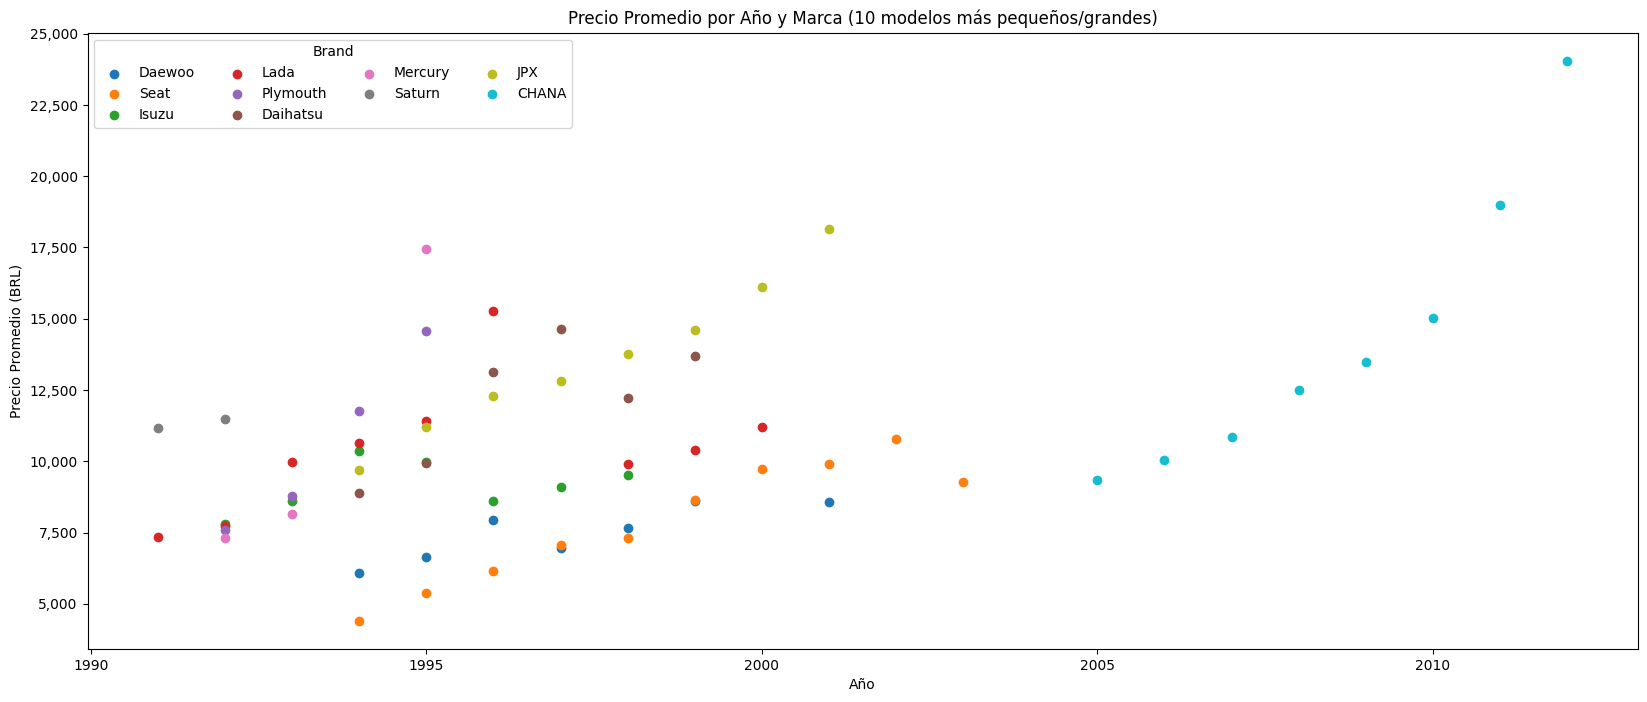

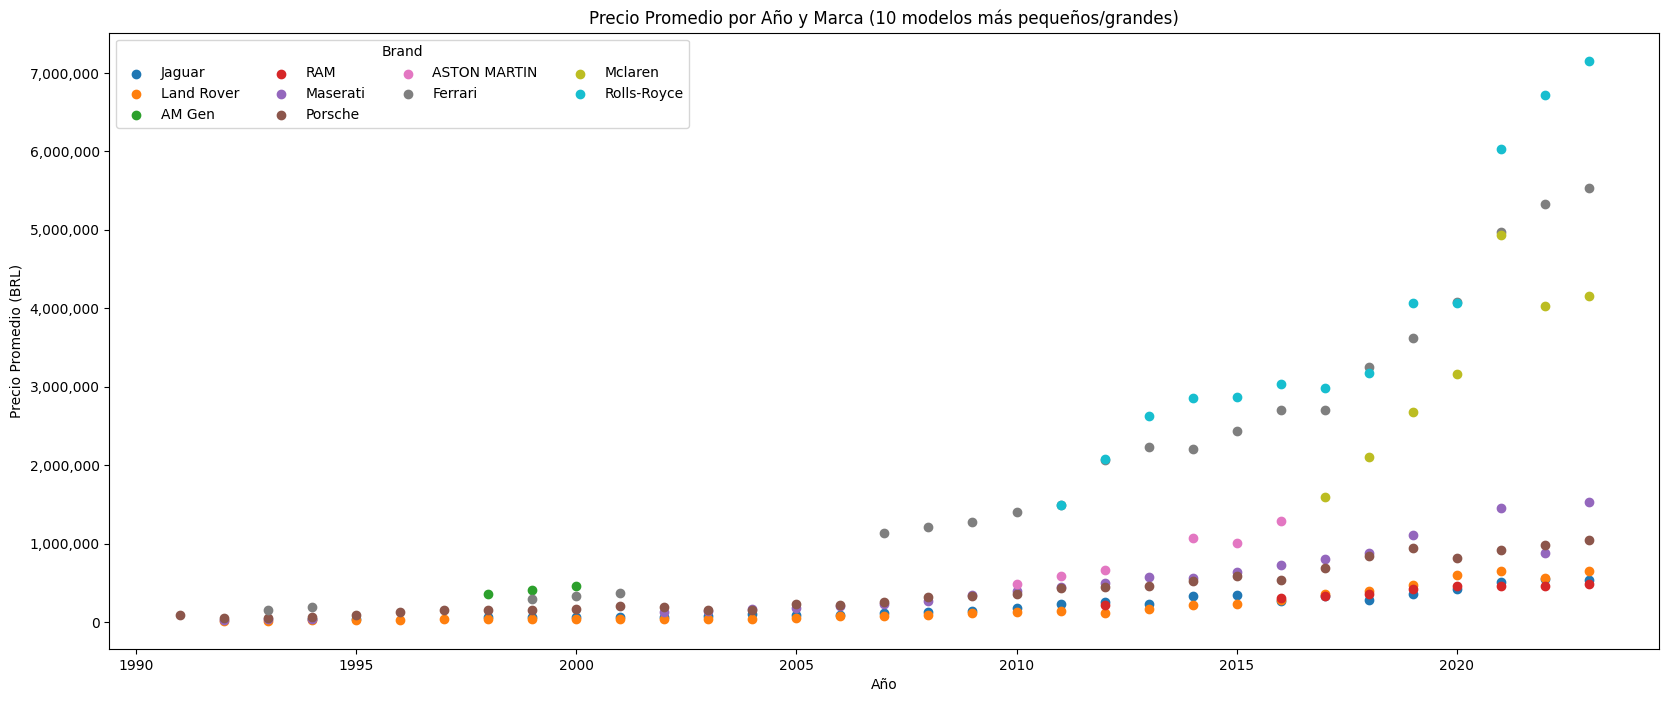

In [ ]:
# @title
# Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el modelo de año (year_model) y marca (brand) pero haciendo foco en las 10 mas caras y las 10 mas baratas.
grupo = datos[['brand', 'avg_price_brl']].groupby(['brand']).mean().sort_values("avg_price_brl").reset_index()
grupo_chico = grupo.head(10)
grupo_grande = grupo.tail(10)

Lista_marca =[grupo_chico, grupo_grande]
grupo = datos[['brand', 'avg_price_brl', 'year_model']].groupby(['brand', 'year_model']).mean().reset_index()

for i in Lista_marca:
  fig, ax = plt.subplots(figsize=(20, 8))

  modelo = i['brand'].unique()
  for modelo in modelo:
      modelo_datos = grupo[grupo['brand'] == modelo]
      ax.scatter(modelo_datos['year_model'], modelo_datos['avg_price_brl'], label=modelo)


  ax.set_title('Precio Promedio por Año y Marca (10 modelos más pequeños/grandes)')

  ax.set_xlabel('Año')
  ax.set_ylabel('Precio Promedio (BRL)')
  formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
  formatter = FuncFormatter(lambda y, pos: '{:,.0f}'.format(y))
  ax.yaxis.set_major_formatter(formatter)


  ax.legend(title='Brand', loc='upper left', ncol=4)

  plt.show()


☝ OBSERVACIÓN:

Vemos que al igual que en el promedio general, en las mas altas, al segmentar el precio por año y marca, los modelos 2011 en adelante de roll-royce practicamente lideran el precio mas alto. Los anteriores a 2011 quien lidera es Ferrari.

En las mas bajas vemos que los modelos mas baratos son anteriores al 2003. Chana a pesar de tener modelos mas nuevos (2005 a 2013) se posiciona entre los 10 mas baratos.

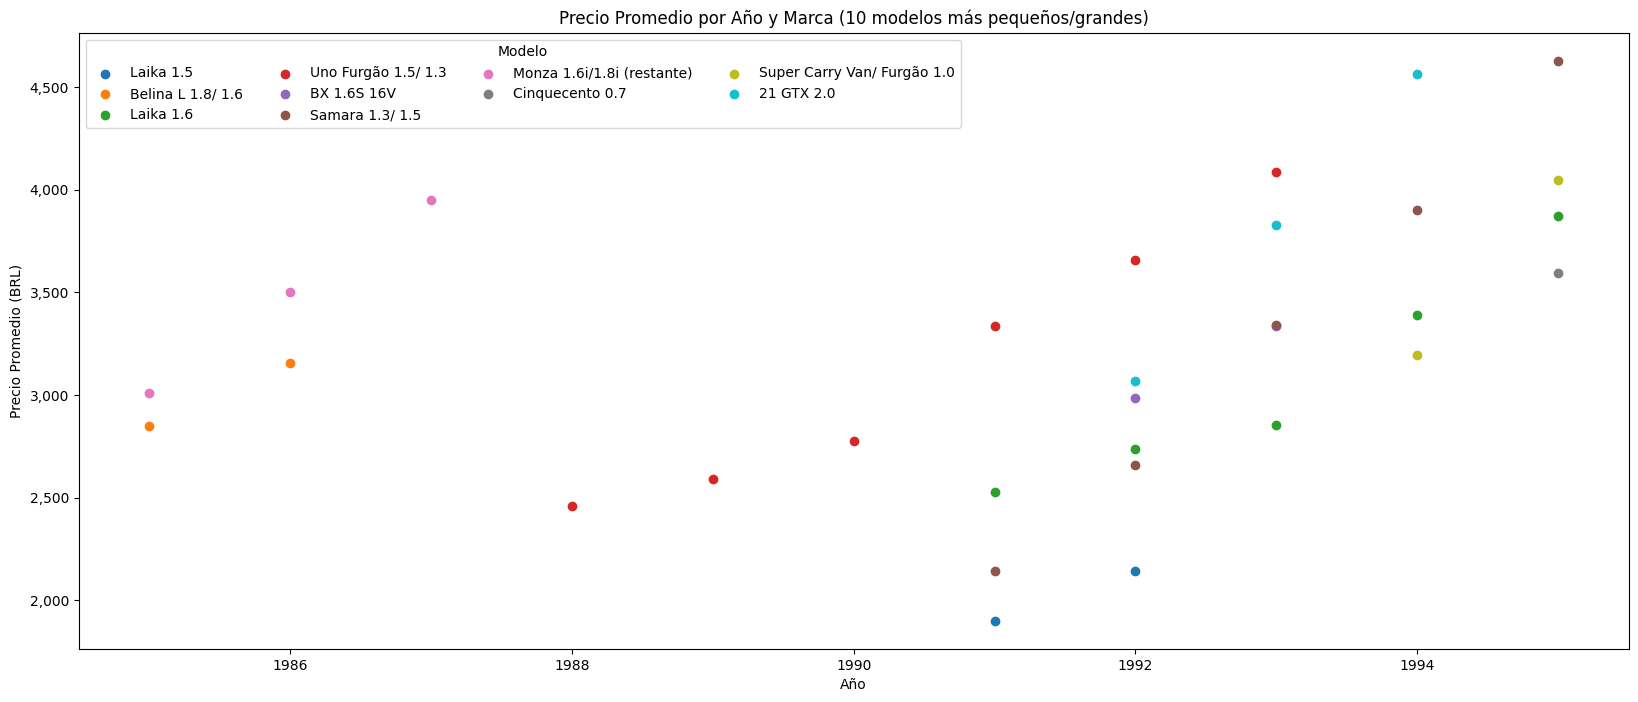

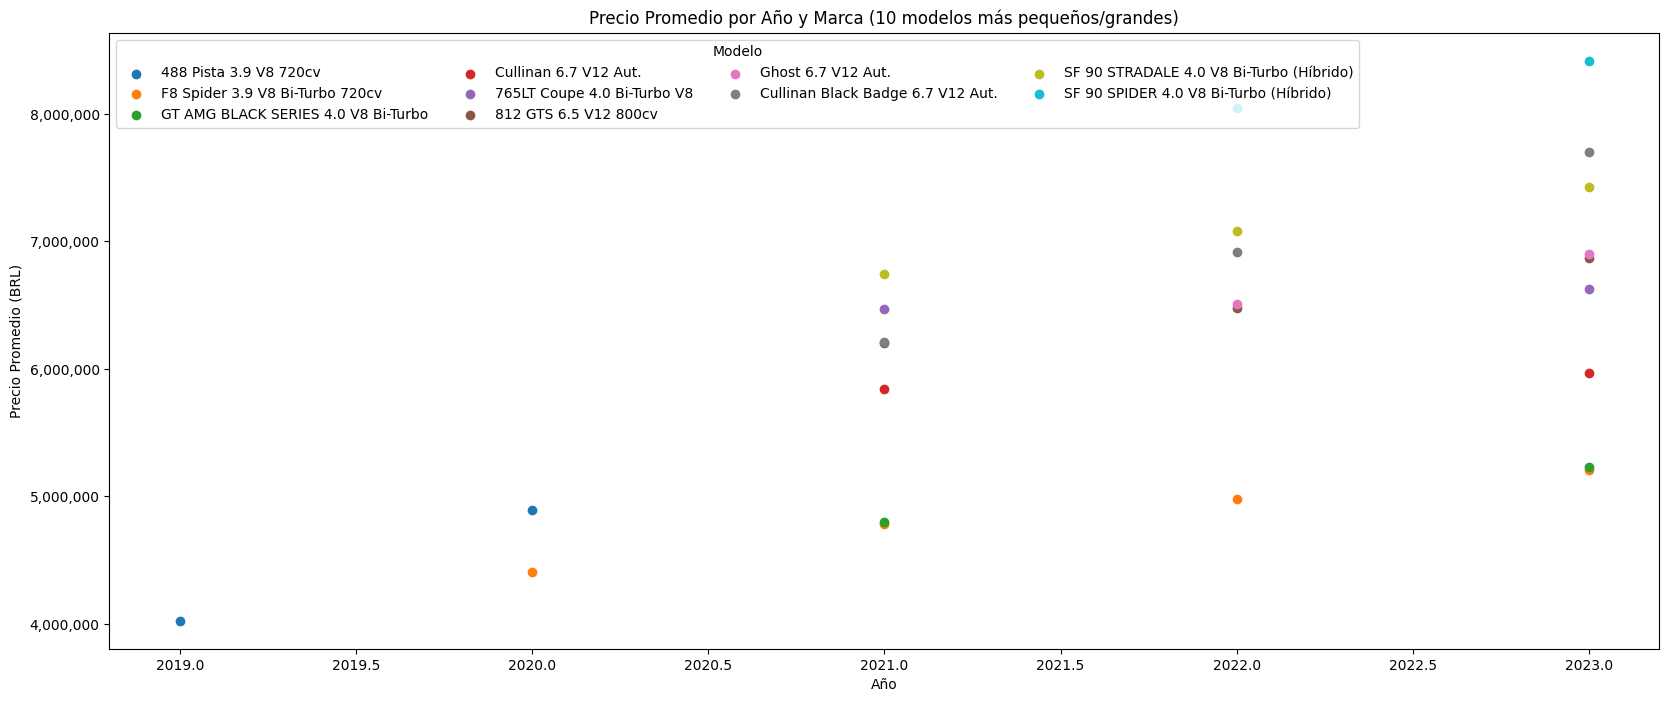

In [ ]:
# @title
# Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el modelo de año (year_model) y modelo (model) haciendo foco en los 10 mas caros y los 10 mas baratos.
grupo = datos[['model', 'avg_price_brl', 'year_model']].groupby(['model', 'year_model']).mean().reset_index()
grupo_chico = grupo.head(10)
grupo_grande = grupo.tail(10)

for i in Lista_modelo:
  fig, ax = plt.subplots(figsize=(20, 8))

  modelo = i['model'].unique()
  for modelo in modelo:
      modelo_datos = grupo[grupo['model'] == modelo]
      ax.scatter(modelo_datos['year_model'], modelo_datos['avg_price_brl'], label=modelo)


  ax.set_title('Precio Promedio por Año y Marca (10 modelos más pequeños/grandes)')

  ax.set_xlabel('Año')
  ax.set_ylabel('Precio Promedio (BRL)')
  formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
  formatter = FuncFormatter(lambda y, pos: '{:,.0f}'.format(y))
  ax.yaxis.set_major_formatter(formatter)


  ax.legend(title='Modelo', loc='upper left', ncol=4)

  plt.show()

☝ OBSERVACIÓN:

Entre los mas caros observamos que lidera ferrari con su modelos SF 90 SPIDER y STRADALE. Y recien el tercer modelo es un Roll-royce. Se ve la diferencia con el analisis bivariado de a;o y marca donde lidera Roll-royce pero al bajar a modelo, el mas caro lo tiene ferrari.

Entre los baratos vemos que Laika del '91 y del '92 son los mas baratos.

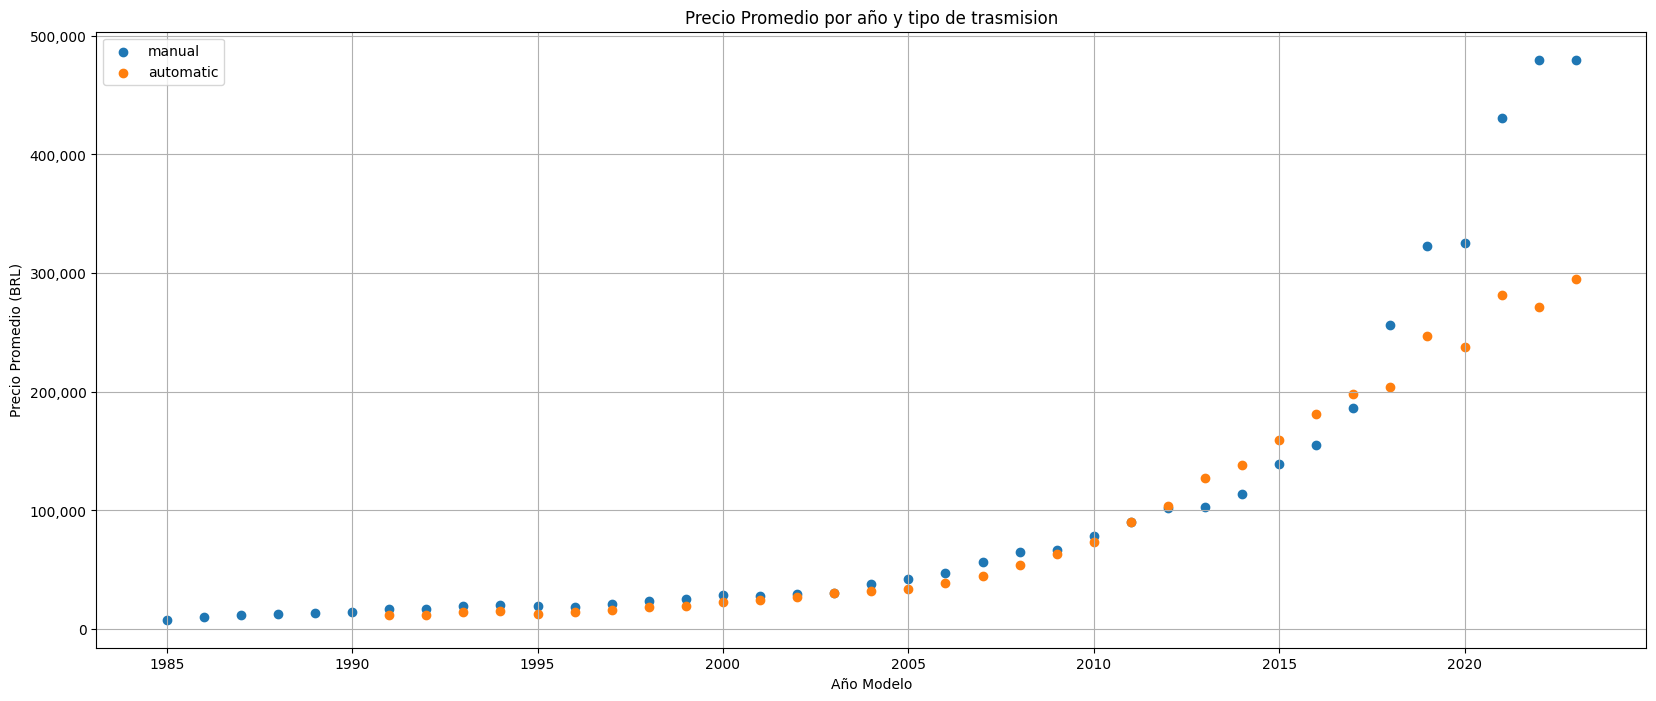

In [ ]:
# @title
# Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el modelo de año (year_model) y tipo de transmision (gear).
grupo = datos[['gear', 'avg_price_brl', 'year_model']].groupby(['gear', 'year_model']).mean().reset_index()

fig, ax = plt.subplots(figsize=(20, 8))

gear =datos['gear'].unique()
for gear in gear:
      brand_data = grupo[grupo['gear'] == gear]
      ax.scatter(brand_data['year_model'], brand_data['avg_price_brl'], label=gear)


ax.set_title('Precio Promedio por año y tipo de trasmision')

ax.set_xlabel('Año Modelo')
ax.set_ylabel('Precio Promedio (BRL)')
#ax.set_ylim(0,100000)

formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

ax.legend(title='gear', loc='upper left', ncol=5)
plt.legend()
plt.grid()
plt.show()

☝ OBSERVACIÓN: A diferencia del dato observado en el global univariado, se observa que hasta 2013 los autos manuales eran igual o un poco mas caros que los automaticos. Durante 2013 y 2017, los autos automaticos eran mas caros. Y a partir de 2018 los autos manuales vuelven a ser mas elevados.

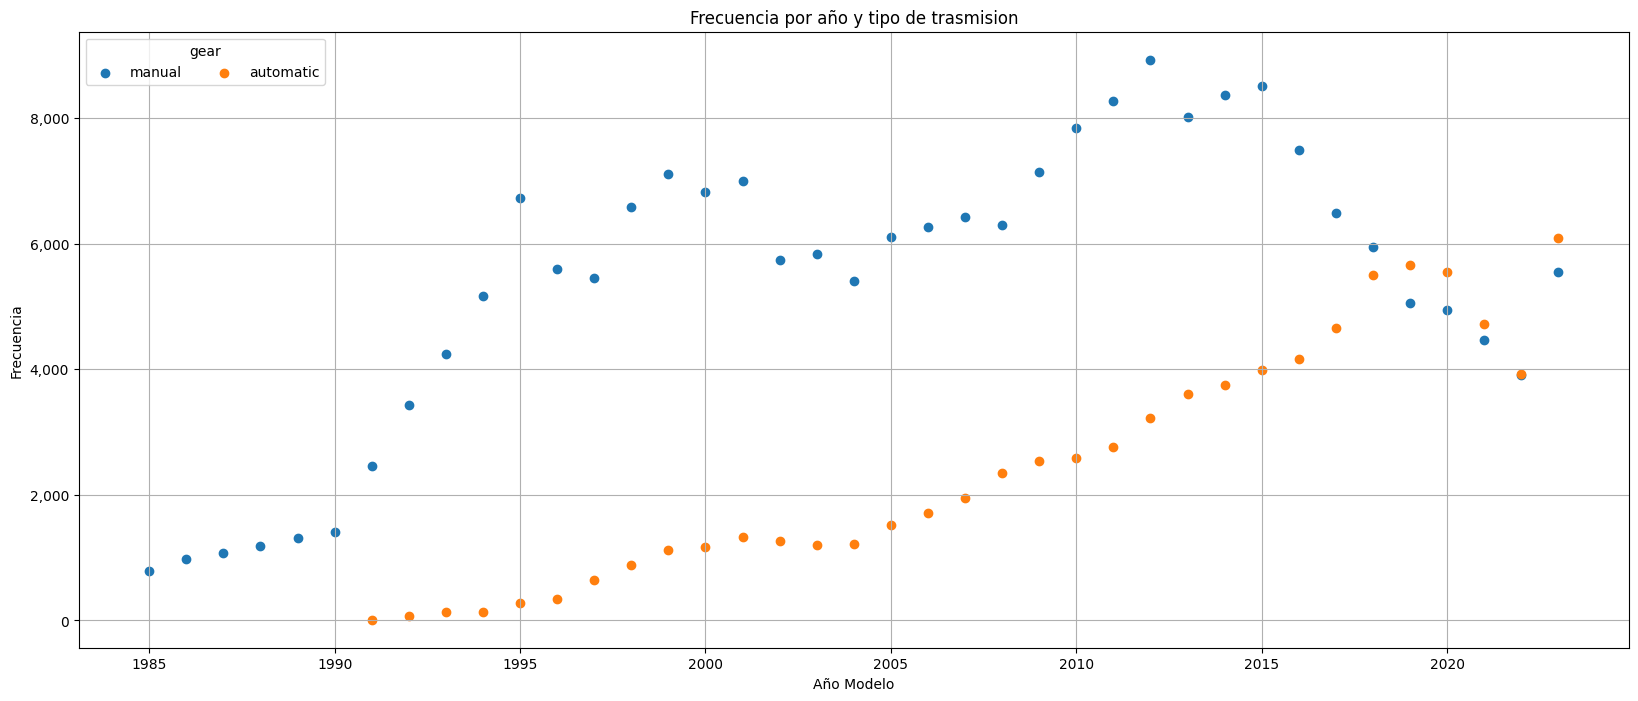

In [ ]:
#Grafico de  cantidad de muestras por año para analisis de automatico vs manual
grupo = datos[['gear', 'avg_price_brl', 'year_model']].groupby(['gear', 'year_model']).count().reset_index()

fig, ax = plt.subplots(figsize=(20, 8))

gear =datos['gear'].unique()
for gear in gear:
      brand_data = grupo[grupo['gear'] == gear]
      ax.scatter(brand_data['year_model'], brand_data['avg_price_brl'], label=gear)


ax.set_title('Frecuencia por año y tipo de trasmision')

ax.set_xlabel('Año Modelo')
ax.set_ylabel('Frecuencia')
#ax.set_ylim(0,100000)

formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

ax.legend(title='gear', loc='upper left', ncol=5)
plt.grid()
plt.show()

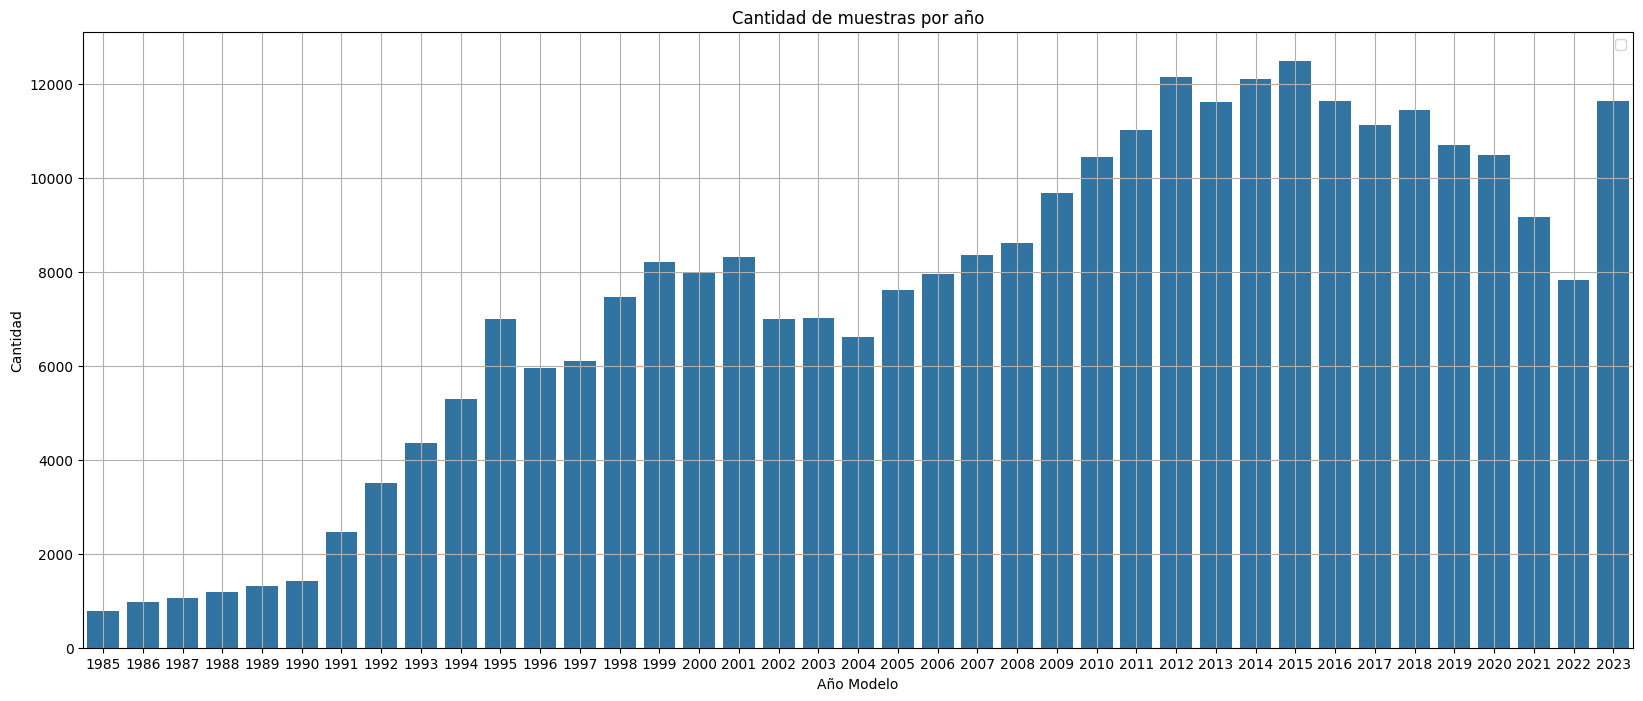

In [ ]:
grupo = datos[['avg_price_brl', 'year_model']].groupby(['year_model']).count().reset_index()

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x='year_model', y='avg_price_brl', data=grupo)

# Configurar el título y etiquetas del gráfico
plt.title('Cantidad de muestras por año')
plt.xlabel('Año Modelo')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.legend()
plt.grid()
plt.show()

☝ OBSERVACIÓN: Este grafico explica el porque el  precio promedio del total de vehiculos automaticos era mayor al de los manuales, pero al observar la grafica existian mayor cantidad de años donde el manual era mas caro.
Esto se debe a que en los años con mayor cantidad de muestras (2012 a 2017) son los años donde los automaticos son mas caros. Ademas, durante los primeros 6 años (1985 a 1991) solo existen manuales con precios bajos. Esto hace que en el promedio general el precio de los manuales sea menor a el precio de los automaticos.

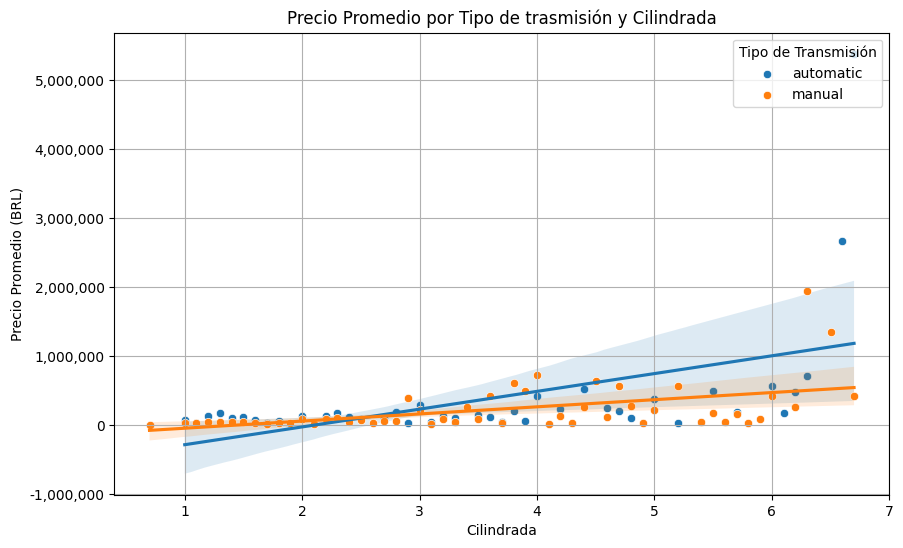

In [ ]:
# @title
# Hacemos la comparacion de nuestra variable objetivo (avg_price_brl) contra el tipo de transmision (gear) y el tamaño del motor (engine_size).
grupo = datos[['gear', 'avg_price_brl', 'engine_size']].groupby(['gear', 'engine_size']).mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

for gear in grupo['gear'].unique():
    gear_data = grupo[grupo['gear'] == gear]
    sns.scatterplot(data=gear_data, x='engine_size', y='avg_price_brl', label=gear, ax=ax)
    sns.regplot(data=gear_data, x='engine_size', y='avg_price_brl', scatter=False, ax=ax)

ax.set_title('Precio Promedio por Tipo de trasmisión y Cilindrada')
ax.set_xlabel('Cilindrada')
ax.set_ylabel('Precio Promedio (BRL)')
ax.legend(title='Tipo de Transmisión', loc='upper right')

formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)
plt.grid(True)
plt.show()


☝ OBSERVACIÓN: En esta grafica de tendencia, vemos que en funcion de la cilindrada los precios aumentan (como en el univariado). Ademas se cruzan en 2.5 de cilindrada donde en promedio los precios de un automatico y un manual se igualan. A medida que aumentan las cilindradas, la tendencia de precio del automatico es mayor a la del manual. Existen casos de manuales con cilindrada alta que son mas caros que el automatico, por esta razon no podemos generalizarlo.


```

# Conclusiones

A traves del EDA realizado notamos que las principales caracteristicas que influyen en los precios de los vehiculos mas caros son las siguientes:


*   Modelo de año
*   Cilindrada del motor (Grafico de precio promedio por cilindrada) >6L
*   Tipo de Transmisión (Grafico Precio Promedio por tipo de trasmision) - Manual
*   Modelo del auto







